In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [4]:
df.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [7]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [8]:
sns.set_theme('paper')

## **Exploratory data analysis**

### 1-Categorical and binary  features

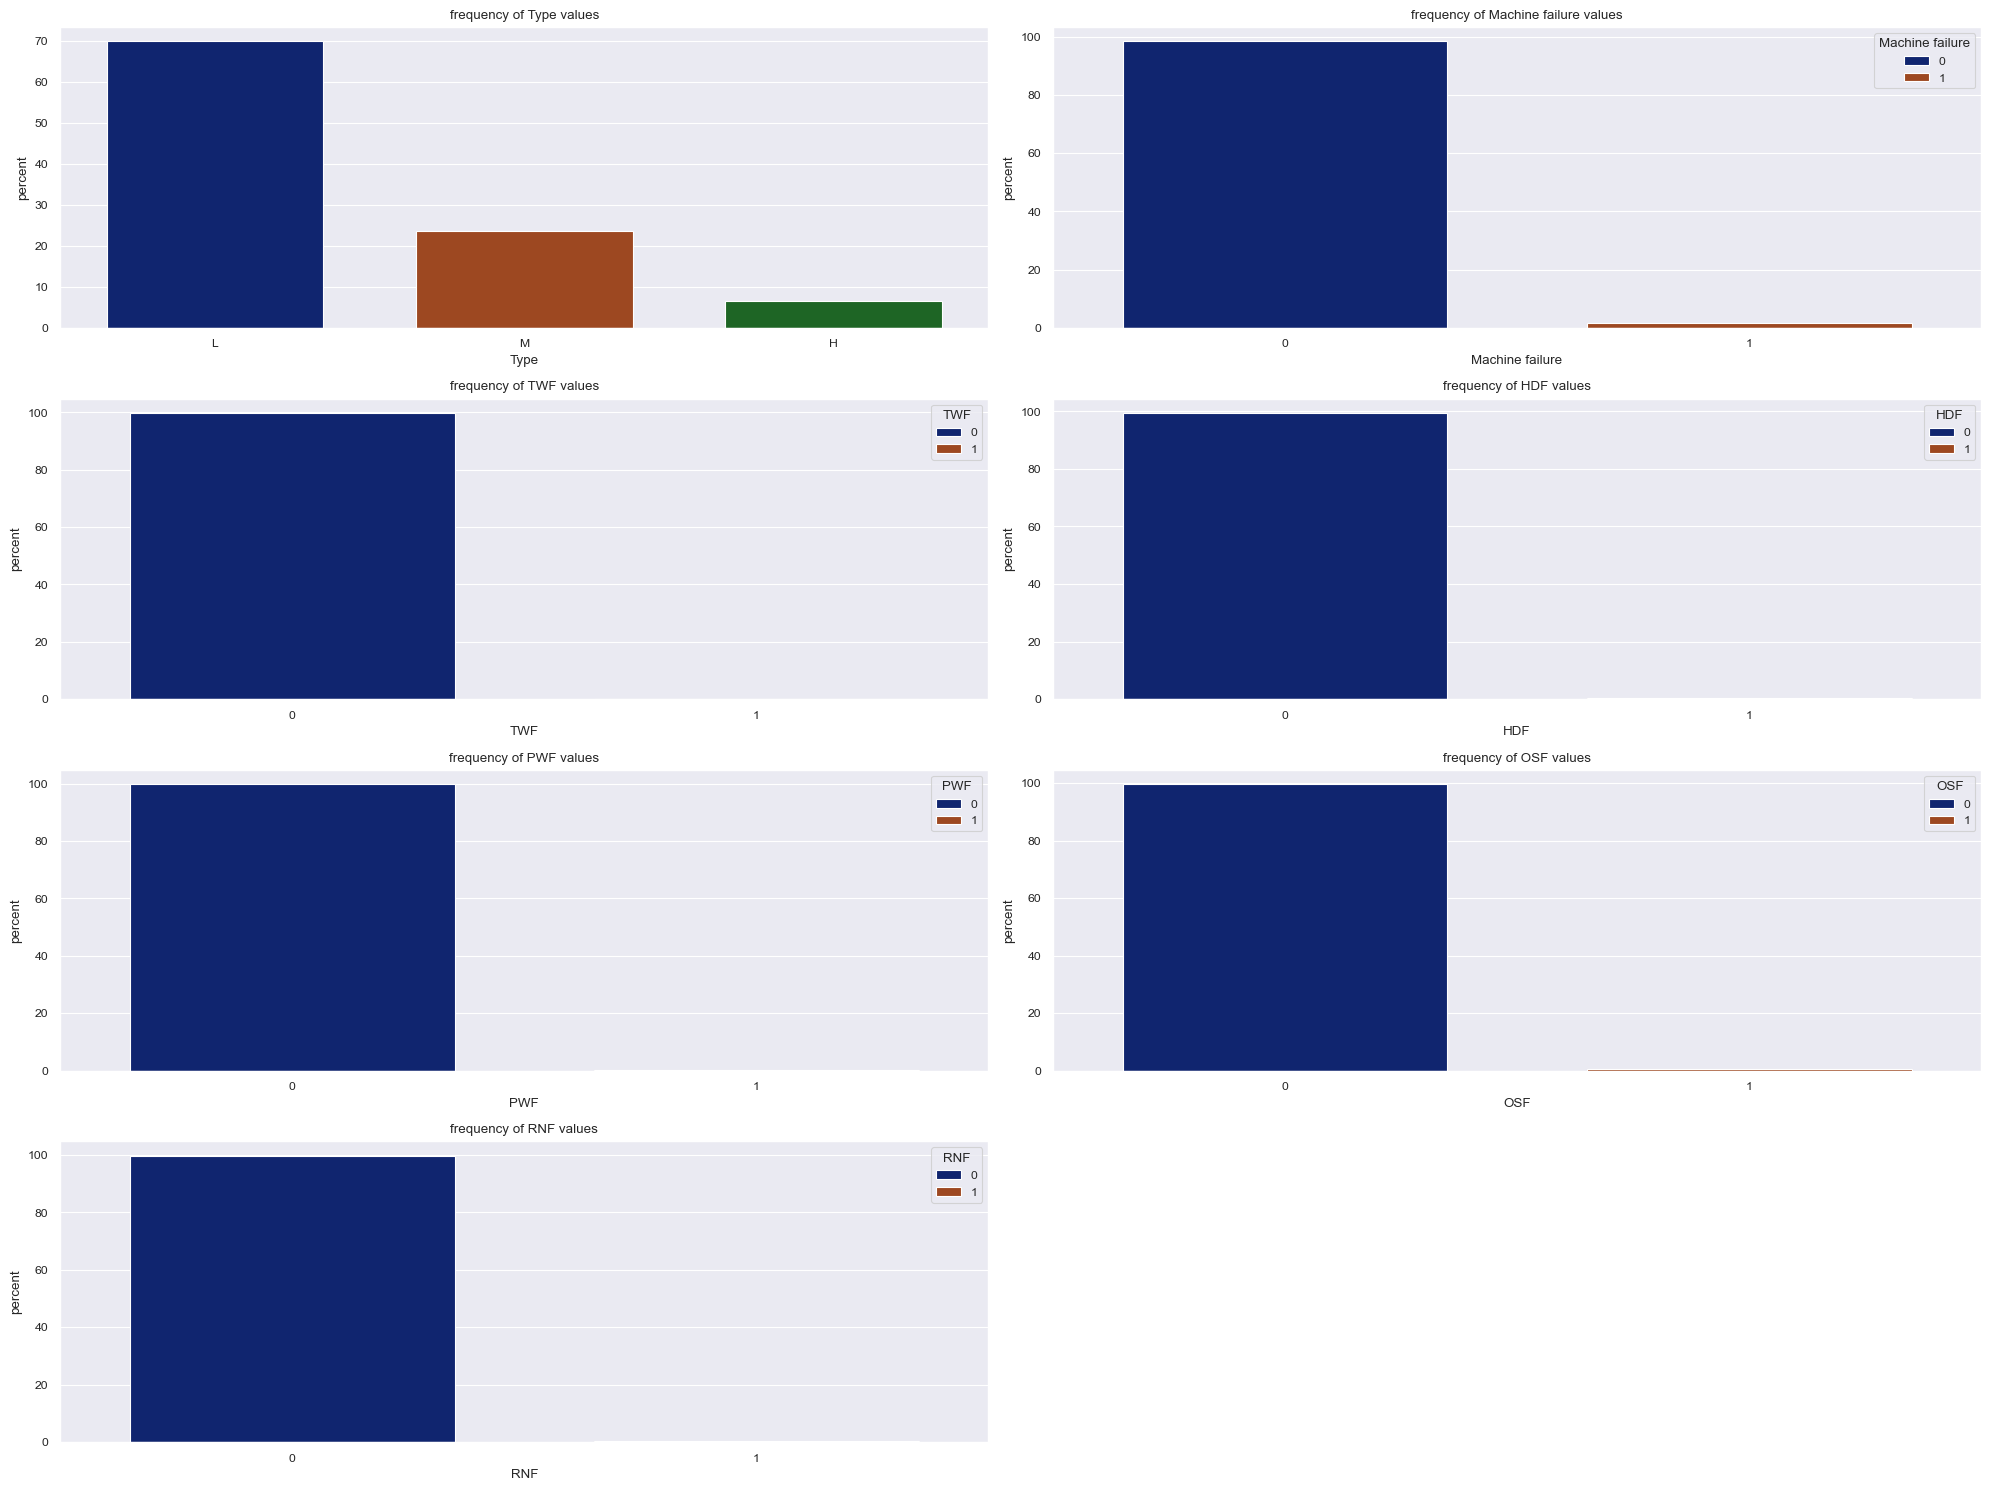

In [9]:
categ_features = ['Type','Machine failure', 'TWF', 'HDF', 'PWF', 'OSF','RNF']

fig , ax = plt.subplots(4,2,figsize=(20,15))
ax = ax.flatten()

for i , col in enumerate(categ_features):
    sns.countplot(df , x = col , hue = col , palette="dark",ax=ax[i],dodge=False,width=0.7,stat='percent')
    ax[i].set_title(f'frequency of {col} values')
fig.delaxes(ax[-1])    
plt.tight_layout()    

## **observation:**
 from the countplots that represents the frequency of each features variable , first  ``machine failure`` variable dist shows a very low frequency of failure cases meaning that we are dealing with embalance data that can lead our model to be bias toward the none failure and to not capture the failure paterns , second the machine ``Type``, 70% of data are machine type L , 25% type M and H represent only 5% of our data

### 1-Contunious features

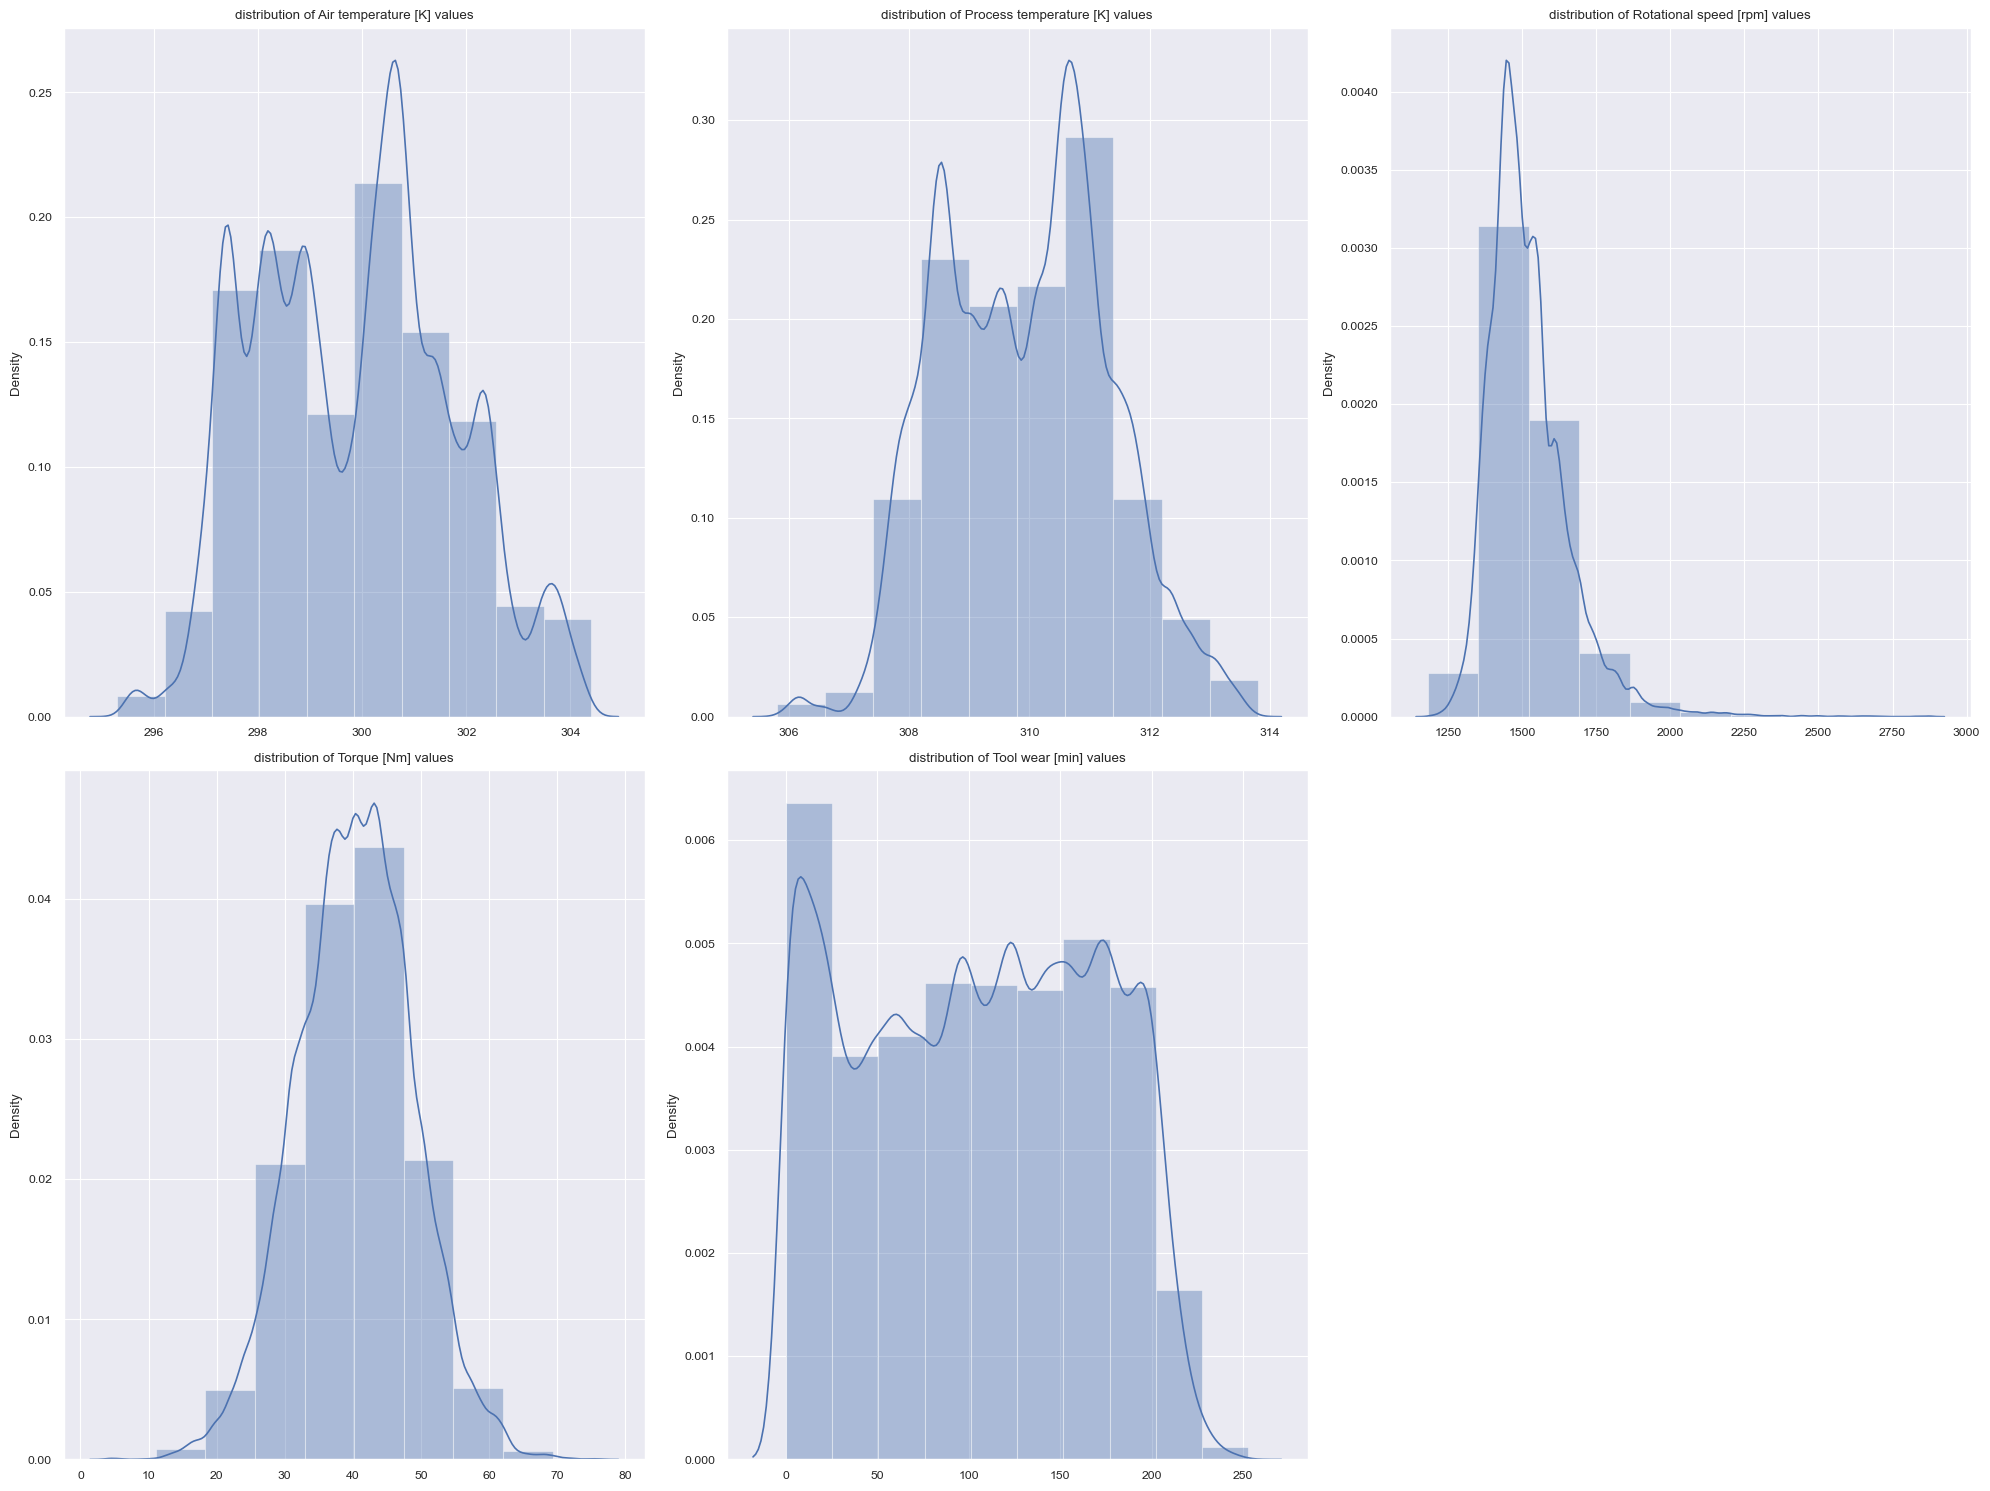

In [10]:
contun_features = ['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]']
fig , ax = plt.subplots(2,3,figsize=(20,15))
ax = ax.flatten()

for i , col in enumerate(contun_features):
    sns.distplot(x = df[col]  ,ax=ax[i],hist=True,bins=10)
    ax[i].set_title(f'distribution of {col} values')
fig.delaxes(ax[-1])    
plt.tight_layout() 


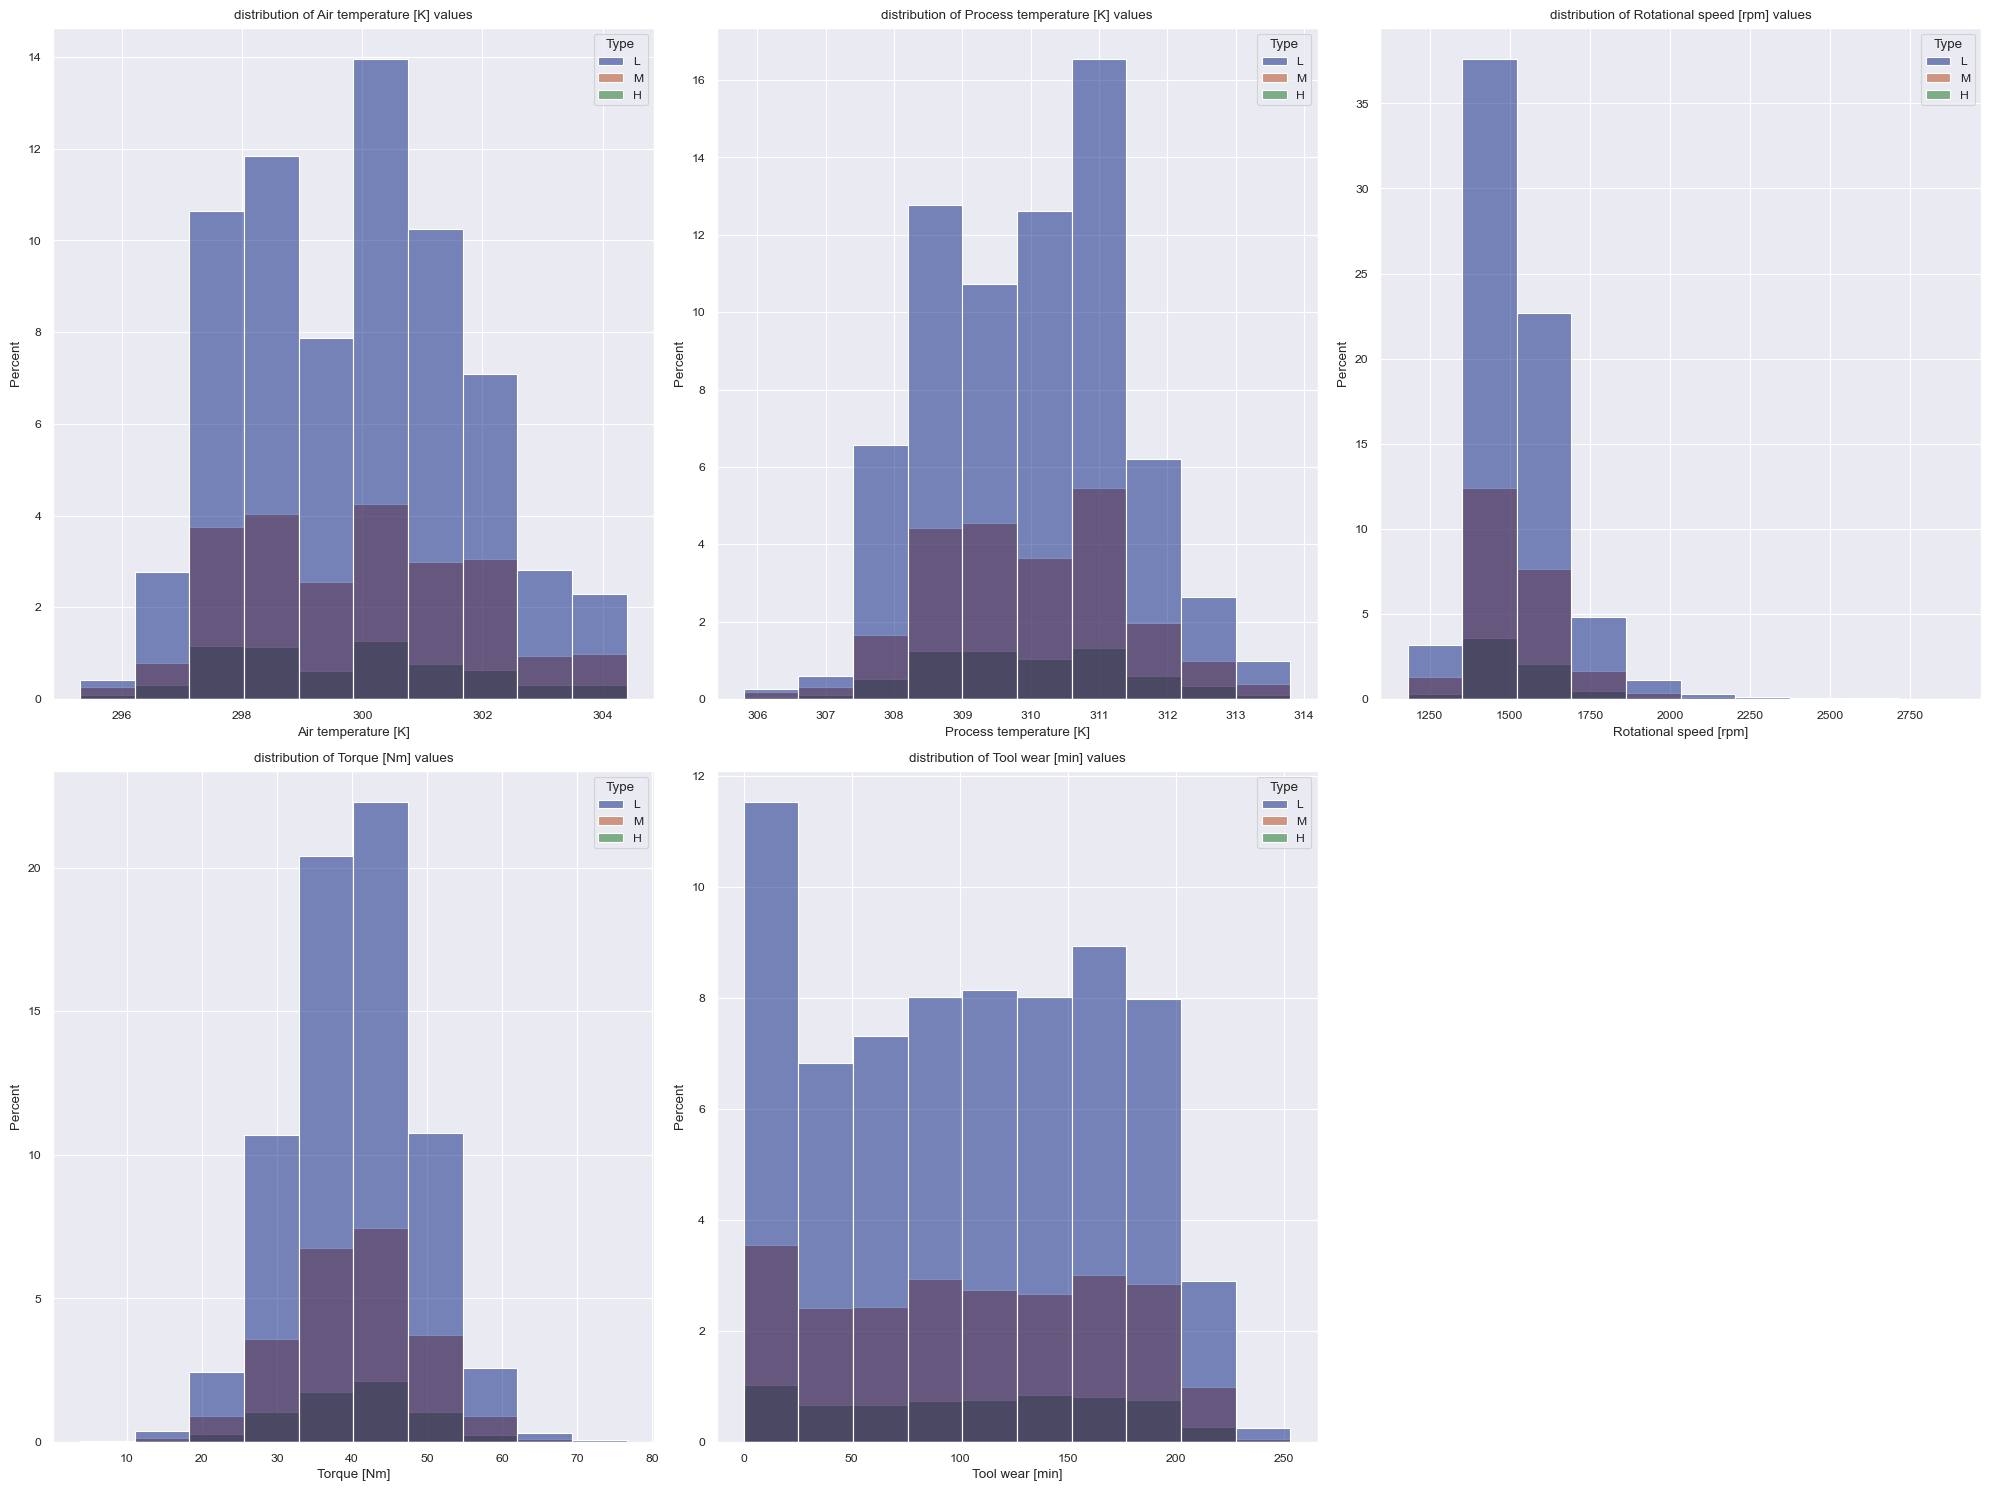

In [11]:
contun_features = ['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]']
fig , ax = plt.subplots(2,3,figsize=(20,15))
ax = ax.flatten()

for i , col in enumerate(contun_features):
    sns.histplot(x = df[col]  ,ax=ax[i],bins=10,hue=df['Type'],stat='percent',palette='dark')
    ax[i].set_title(f'distribution of {col} values')
    
fig.delaxes(ax[-1]) 
plt.tight_layout() 


## **Observation**:
* from the histplot that represents the distribution of contunious variables such as ``Air temperature [K]``,``Process temperature [K]``, ``Rotational speed [rpm]`` ... , for the air temperature most values are btw 276 and 302 , also all the types have the same ranges and distribution , we can say it a normilish-dist , for the rotational speed values from 1500 to 2000 are the most frequent , this variable follows a normal distribution , same goes for all the others variables 

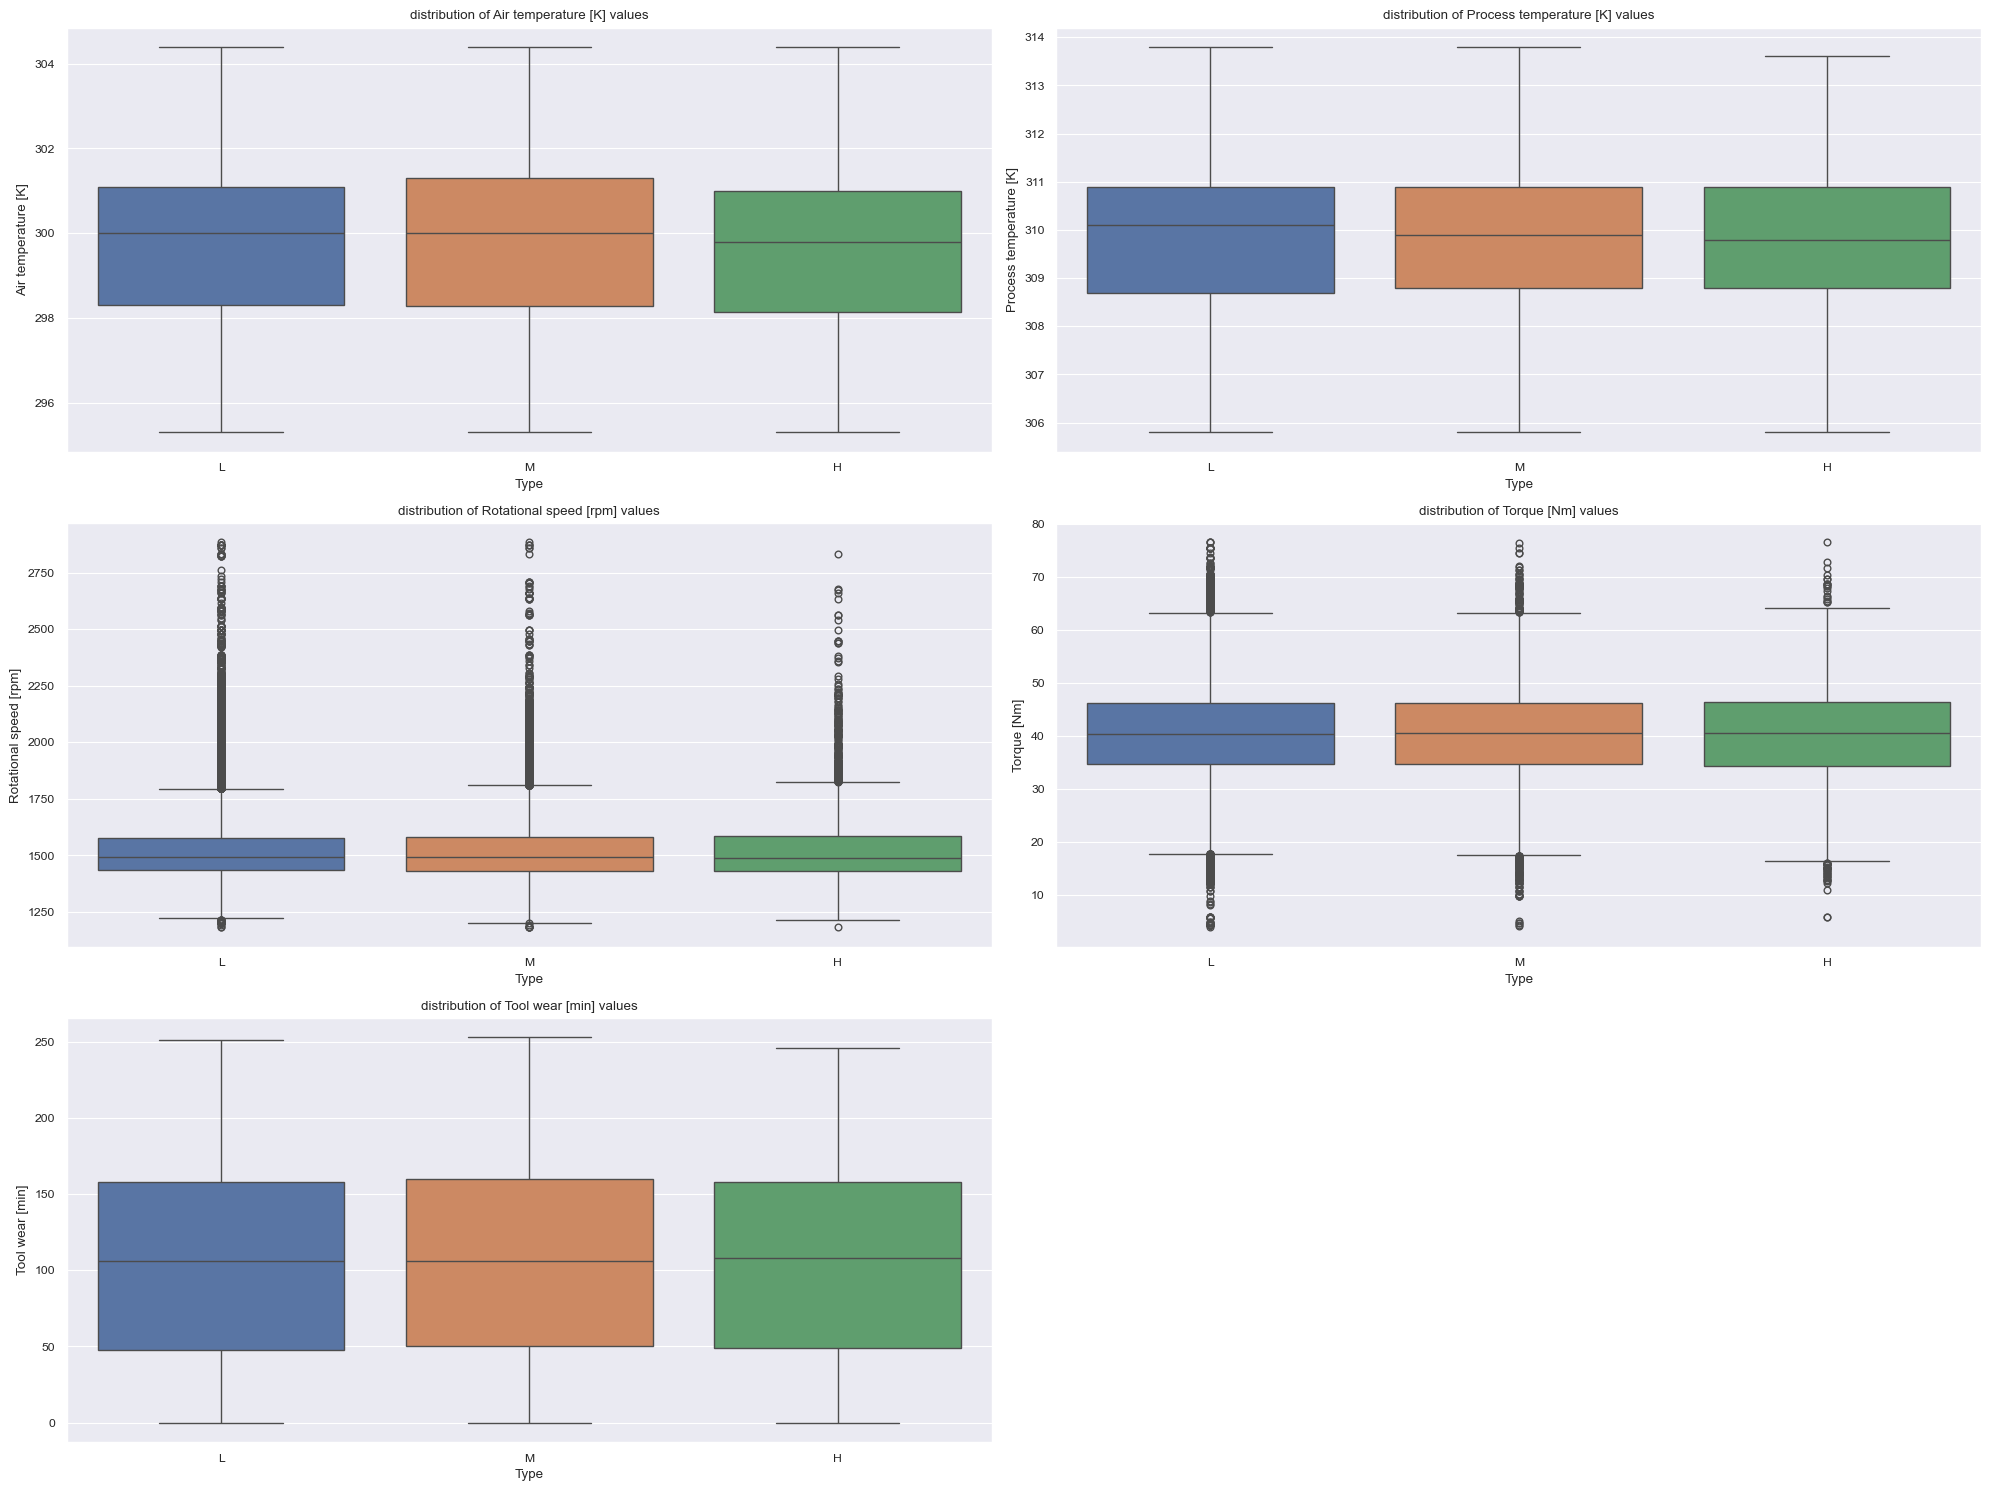

In [12]:
contun_features = ['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]']
fig , ax = plt.subplots(3,2,figsize=(20,15))
ax = ax.flatten()

for i , col in enumerate(contun_features):
    sns.boxplot(y = df[col] , x = df['Type']  ,ax=ax[i],hue=df['Type'])
    ax[i].set_title(f'distribution of {col} values')
    
fig.delaxes(ax[-1]) 
plt.tight_layout() 

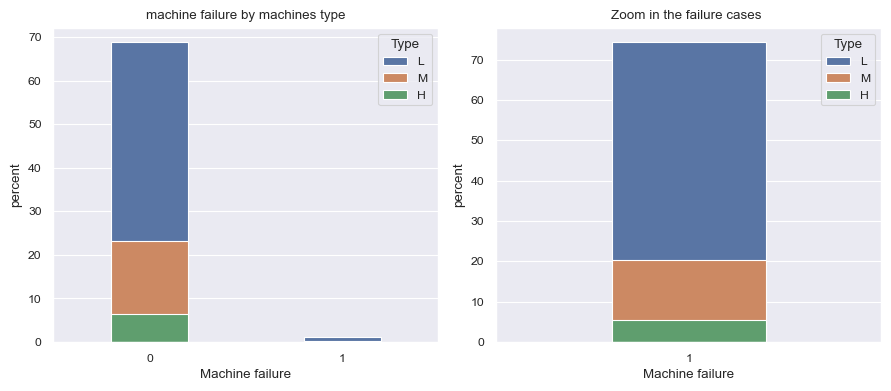

In [13]:
# machine failure by the machine type 
sns.set_theme('paper')
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.countplot(df ,x ="Machine failure",hue='Type',dodge=False,stat='percent',width=0.4 )
plt.title('machine failure by machines type')
plt.subplot(1,2,2)
data = df[df['Machine failure']==1]
sns.countplot(data ,x ="Machine failure",hue='Type',dodge=False,stat='percent',width=0.4 )
plt.title('Zoom in the failure cases ')
plt.tight_layout()


Our dataset is imbalanced, with less than 3% representing failure cases.
In the second plot (Process Temperature), failure cases appear more frequent in machines of Type L, while Types M and H show fewer failures.
However, this does not necessarily mean that Type L machines are more failure-prone — it might simply reflect the fact that Types M and H together make up only 30% of the total dataset.
Therefore, the raw count of failures in each machine type can be misleading.
To properly assess failure likelihood per type, we should look at the failure rate per type, not just the frequency of failures.

In [14]:
# computing the normalised failure rate 

type_count =df['Type'].value_counts()
failure = df[df['Machine failure'] == 1]['Type'].value_counts()

In [15]:
type_count = type_count.sort_index()
failure = failure.sort_index()

failure_rate = [ failure[i] / type_count[i] for i in type_count.index]
FR_data= pd.DataFrame({"rate":failure_rate,"Type":df['Type'].unique()})

Text(0.5, 1.0, 'failure rate by machine type')

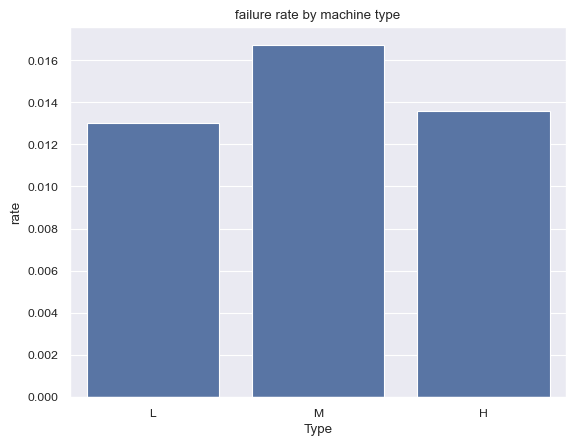

In [16]:
sns.barplot(FR_data, y = 'rate', x='Type')
plt.title('failure rate by machine type')

So while raw failure counts were dominated by L (just because there are so many of them), normalized failure rates show that L is a bit more prone to failure — but not dramatically.

In [17]:
df_num = df.copy()

In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
dummies = pd.get_dummies(df['Type']).astype(int)

In [20]:
dummies

,H,L,M
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
136424,0,0,1
136425,1,0,0
136426,0,1,0
136427,0,1,0


In [21]:
df = pd.concat([df.drop('Type',axis=1),dummies],axis=1)
df

,id,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,0,L50096,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,1,M20343,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,2,L49454,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,3,L53355,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,4,M24050,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,0,0,1
136425,136425,H38017,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,1,0,0
136426,136426,L54690,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,0,1,0
136427,136427,L53876,301.7,310.9,1447,46.3,42,0,0,0,0,0,0,0,1,0


In [22]:
df.drop(['Product ID'],axis=1,inplace=True)

<Axes: >

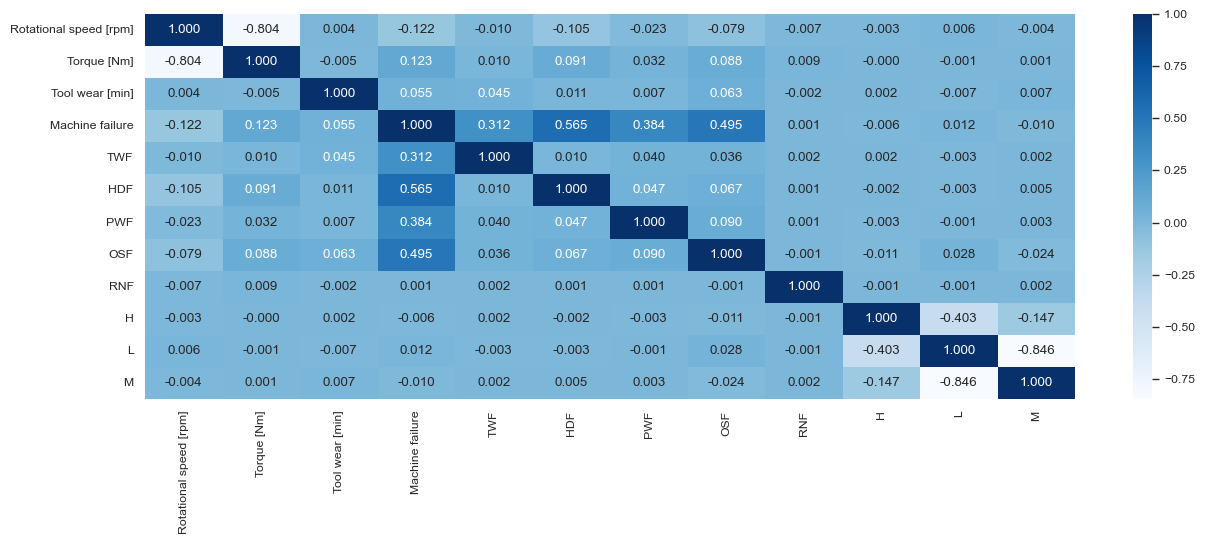

In [23]:
plt.figure(figsize=(15,5))
sns.heatmap(df.iloc[:,3:].corr(method='spearman'),annot=True,fmt='.3f',cmap='Blues')


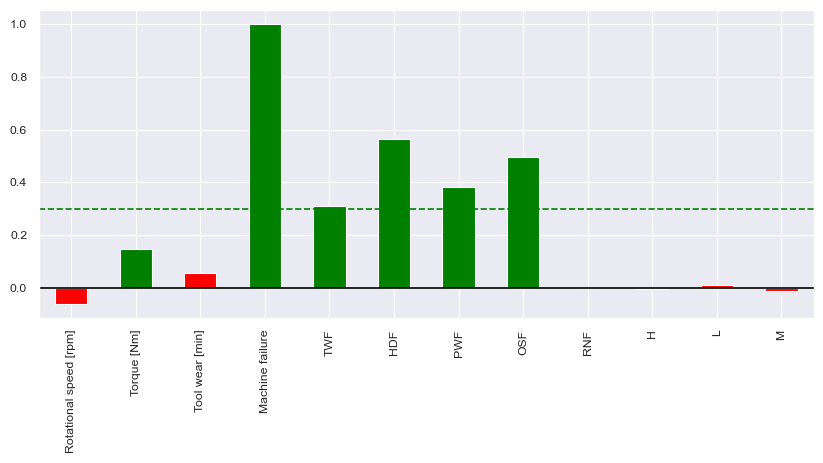

In [24]:
corr_failure = df.iloc[:,3:].corrwith(df['Machine failure']).round(3)
color = ['red' if x < 0.1 else 'green' for x in corr_failure]
plt.figure(figsize=(10,4))
corr_failure.plot(kind='bar',color=color)
plt.axhline(y=0,color='black')
plt.axhline(y=0.3,linestyle='--',color='green')


## **observation :**
* from the heatmap and the barplot we can see that we it exist a high correlation btw our independent variable and the dependent variable  ``TWF, HDF, PWF, OSF`` :

* HDF (Heat Dissipation Failure): 0.565

* PWF (Power Failure): 0.384

* OSF (Overstrain Failure): 0.495

* TWF (Tool Wear Failure): 0.312

RNF: Very low while the correlation rate is lower than 0.1 for the rest of the features , this variable are binary meanning that when this evenets happend it results a failure 



In [38]:
from sklearn.model_selection import  train_test_split 
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import  SVC
from sklearn.metrics import  classification_report , confusion_matrix ,roc_curve
from sklearn.preprocessing import  StandardScaler
from xgboost import XGBRFClassifier
from imblearn.over_sampling import SMOTE
import mlflow
from sklearn.compose import  ColumnTransformer
from imblearn.pipeline import Pipeline
from lightgbm import LGBMClassifier

In [26]:
df.drop('id',axis=1,inplace=True)

In [27]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1


In [28]:
binary_features = ['L', 'M', 'H', 'TWF', 'HDF', 'OSF', 'RNF', 'PWF']
preprocesser = ColumnTransformer(transformers=[
    ('num',StandardScaler(),contun_features),
    ('binary','passthrough',binary_features)
])

pipeline = Pipeline(steps=[
    ('processing',preprocesser),
    ('smote',SMOTE(random_state=42)),
    ('classifier',RandomForestClassifier())
])   

In [29]:
pipeline

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Air temperature [K]',
                                                   'Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   'Torque [Nm]',
                                                   'Tool wear [min]']),
                                                 ('binary', 'passthrough',
                                                  ['L', 'M', 'H', 'TWF', 'HDF',
                                                   'OSF', 'RNF', 'PWF'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier())])

In [30]:
test_data = pd.read_csv('test.csv')
test_data

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [31]:
## preparing the testing data 

test_data = pd.read_csv('test.csv')
test_data = pd.concat([test_data.drop(["id","Product ID"],axis=1),pd.get_dummies(test_data['Type']).astype(int)],axis=1)
test_data.drop('Type',axis=1,inplace=True)

In [32]:
x,y= df.drop('Machine failure',axis=1),df[['Machine failure']]
x_train,x_test , y_train,y_test = train_test_split(x,y, random_state=42,test_size=0.3) 

## **building the first ML model**

**Machine Failure Classification Strategy**
After performing Exploratory Data Analysis (EDA), data cleaning, and preprocessing, we are now ready to build a classification model to predict machine failures. For this task, we will explore and evaluate three machine learning models:

* RandomForestClassifier

* XGBRFClassifier

* LGBMClassifier

To manage the machine learning lifecycle, we will use MLflow, a robust MLOps tool that allows us to:

* Track model performance across experiments

* Log hyperparameters and metrics

* Compare different model versions

* Serve models through a REST API

**Handling Imbalanced Data**
Our dataset is imbalanced, which can bias the model toward the dominant class. To address this, we apply SMOTE (Synthetic Minority Over-sampling Technique) from the imblearn library. SMOTE synthetically generates new examples of the minority class, balancing the dataset and helping the model better learn the underlying patterns.

In addition, we apply StandardScaler to normalize continuous features, ensuring they are on the same scale before training.

** End-to-End Pipeline**
We wrap the entire process in a Pipeline that includes:

* Standardization (scaling numeric features)

* SMOTE (oversampling the minority class during training)

* Model fitting (training the classifier)

* This approach ensures consistency, prevents data leakage, and allows easy experimentation with different models.

 Evaluation Strategy
For evaluation, we focus on:

* Precision: the ability of the model to avoid false positives

* Recall: the ability of the model to detect actual positives (failures)

* To visually assess the performance, we use a confusion matrix heatmap, providing a clear overview of prediction results.

2025/05/06 19:27:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


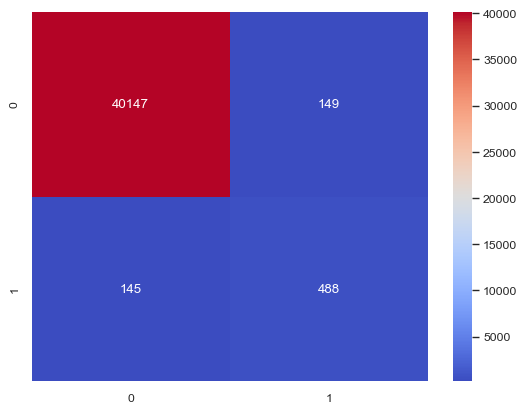

Logged Random_forest to MLflow ✅


2025/05/06 19:27:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


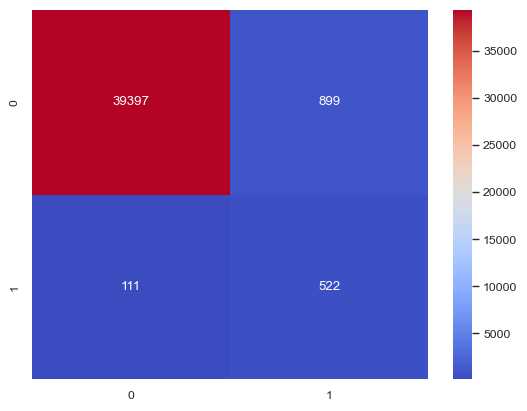

Logged xgboost to MLflow ✅


2025/05/06 19:27:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


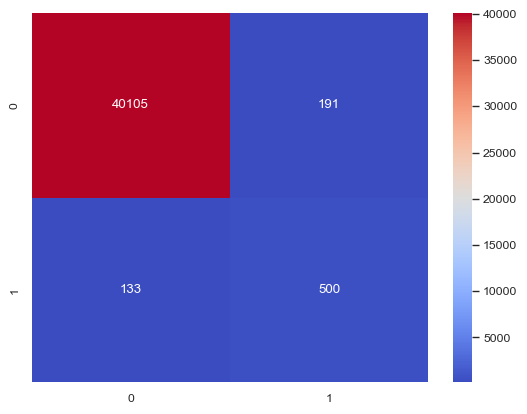

Logged lightgbm to MLflow ✅


In [66]:

mlflow.set_experiment('preventive_maintenance')

models = {
    "Random_forest":RandomForestClassifier(n_estimators=100),
    "xgboost": XGBRFClassifier(),
    "lightgbm": LGBMClassifier(),
}

for name_model , model in models.items():
    with mlflow.start_run(run_name=name_model):
            mlflow.set_tag('training_strategy', 'SMOTE + Pipeline')
            pipeline = Pipeline(steps=[
            ('processing',preprocesser),
            ('smote',SMOTE(random_state=42)),
            (name_model,model)])

            pipeline.fit(x_train,y_train)
            predictin_pipeline = Pipeline(steps=[
            ('processing',preprocesser),
            (name_model,pipeline.named_steps[name_model])])

            y_hat = predictin_pipeline.predict(x_test)
            class_repport = classification_report(y_test,y_hat,output_dict=True)

            mlflow.log_param("model_type",name_model)
            mlflow.log_metric("precision",class_repport["1"]["precision"])
            mlflow.log_metric("recall",class_repport["1"]["recall"])
            mlflow.sklearn.log_model(predictin_pipeline,'model')
            sns.heatmap(confusion_matrix(y_test,y_hat),annot=True,cmap='coolwarm',fmt='d')
            plt.show()

            print(f"Logged {name_model} to MLflow ✅")



In [43]:
from mlflow.tracking import MlflowClient

### **hyperparams tunning**

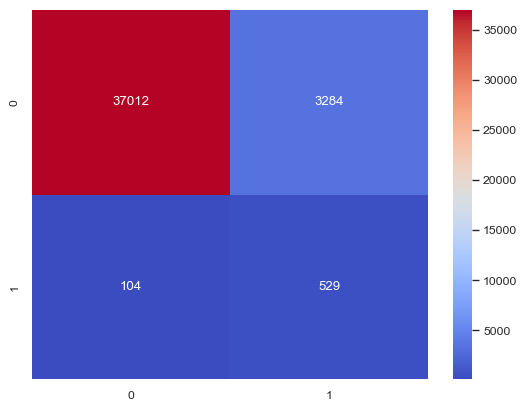

2025/05/06 18:18:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [64]:
from sklearn.model_selection import GridSearchCV

params = {
    "random_for_HPT__n_estimators": [100, 120],
    "random_for_HPT__max_depth": [2, 3]
}

pipeline =  Pipeline(steps=[
            ('processing',preprocesser),
            ('smote',SMOTE(random_state=42)),
            ("random_for_HPT",RandomForestClassifier())])

grid_search = GridSearchCV(pipeline,params,cv=5,scoring='f1')
grid_search.fit(x_train,y_train)
best_model = grid_search.best_estimator_
prediction_pipe = Pipeline(steps=[
    ('processing', preprocesser),
    ('random_for_HPT', best_model)  
])
y_hat = best_model.predict(x_test)
class_repport = classification_report(y_test,y_hat,output_dict=True)
sns.heatmap(confusion_matrix(y_test,y_hat),annot=True,cmap='coolwarm',fmt='d')
plt.show()
with mlflow.start_run(run_name='Random_forest_tunned'):
    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metric("precision", class_repport["1"]["precision"])
    mlflow.log_metric("recall", class_repport["1"]["recall"])
    mlflow.sklearn.log_model(pipeline,"model")

      

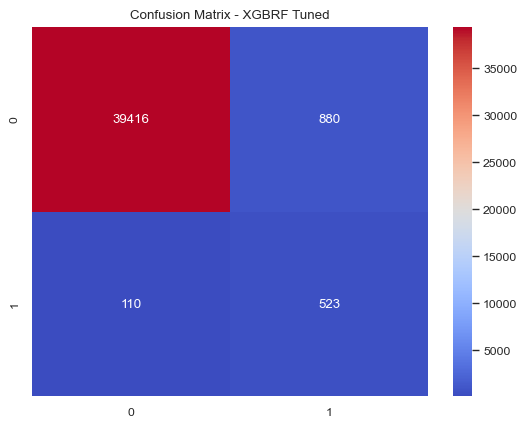

2025/05/06 18:09:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
xgbrf_params = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
    'classifier__gamma': [0, 1],
}

# Pipeline for training with SMOTE
train_pipeline = Pipeline(steps=[
    ('processing', preprocesser),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBRFClassifier())
])

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(train_pipeline, xgbrf_params, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)

# Extract best classifier (already includes best hyperparams)
best_model = grid_search.best_estimator_

# New pipeline for prediction (without SMOTE)
prediction_pipe = Pipeline(steps=[
    ('processing', preprocesser),
    ('classifier', best_model.named_steps['classifier'])  
])

# Evaluation
y_hat = prediction_pipe.predict(x_test)
class_repport = classification_report(y_test, y_hat, output_dict=True)

# Visualization
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, cmap='coolwarm', fmt='d')
plt.title("Confusion Matrix - XGBRF Tuned")
plt.show()

# Logging with MLflow
with mlflow.start_run(run_name='xgboost_HPT'):
    mlflow.set_tag("description", "Tuning XGBoost hyperparameters using GridSearchCV")
    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metric("precision", class_repport["1"]["precision"])
    mlflow.log_metric("recall", class_repport["1"]["recall"])
    mlflow.sklearn.log_model(prediction_pipe, "model")


### **models evaluation plot with 1-precision :**
!![Confusion Matrix](precision.png)

### **models evaluation plot with 1-recall :**
![Confusion Matrix](recall.png)
